In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

G = nx.Graph()

In [17]:
with open("Lottery_Powerball_Winning_Numbers__Beginning_2010.csv", "r") as file:
    next(file) #skip header line in CSV

    #iterate through each row in the file
    for line in file:

        #split line by commas
        parts = line.strip().split(",")
        
        #if len(parts) < 2:
            #continue

        #split the second part of each row (winning numbers) into a list 
        winning_numbers = parts[1].split()
    
        #create set and flag to check for duplicate numbers in the list of winning numbers
        seen = set()  
        has_duplicates = False

        #iterate through winning numbers to detect duplicates 
        for num in winning_numbers:
            
            #if the number has been seen, it's a duplicate
            if num in seen:
                #set the flag to true if it's duplicate
                has_duplicates = True
                break
                
            #add the number to the set that have been seen    
            seen.add(num)
        
        #skip this row if there are duplicates
        if has_duplicates:
            continue
    
        #add unique winning numbers to the graph as nodes
        for num in winning_numbers:
            G.add_node(num)
    
        #add edges between every pair of numbers that appear together
        for i in range(len(winning_numbers)):
            for j in range(i + 1, len(winning_numbers)):
                G.add_edge(winning_numbers[i], winning_numbers[j])


In [18]:
#ensure nodes were added correctly
print(f"Total Nodes: {G.number_of_nodes()}")

#ensure edges were added correctly
print(f"Total Edges: {G.number_of_edges()}")

Total Nodes: 69
Total Edges: 2344


In [19]:
#calculate degree centrality of all the nodes in the graph
degree_centrality = nx.degree_centrality(G)

#sort degree centrality by lowest and select bottom 6
bottom_4 = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=False)[:4]


print("Bottom 4 Numbers and their Centrality:")
print()
for number, centrality in bottom_4:
    print(f"Number: {number}: {centrality:.4f}")

Bottom 4 Numbers and their Centrality:

Number: 53: 0.9853
Number: 65: 0.9853
Number: 51: 0.9853
Number: 61: 0.9853


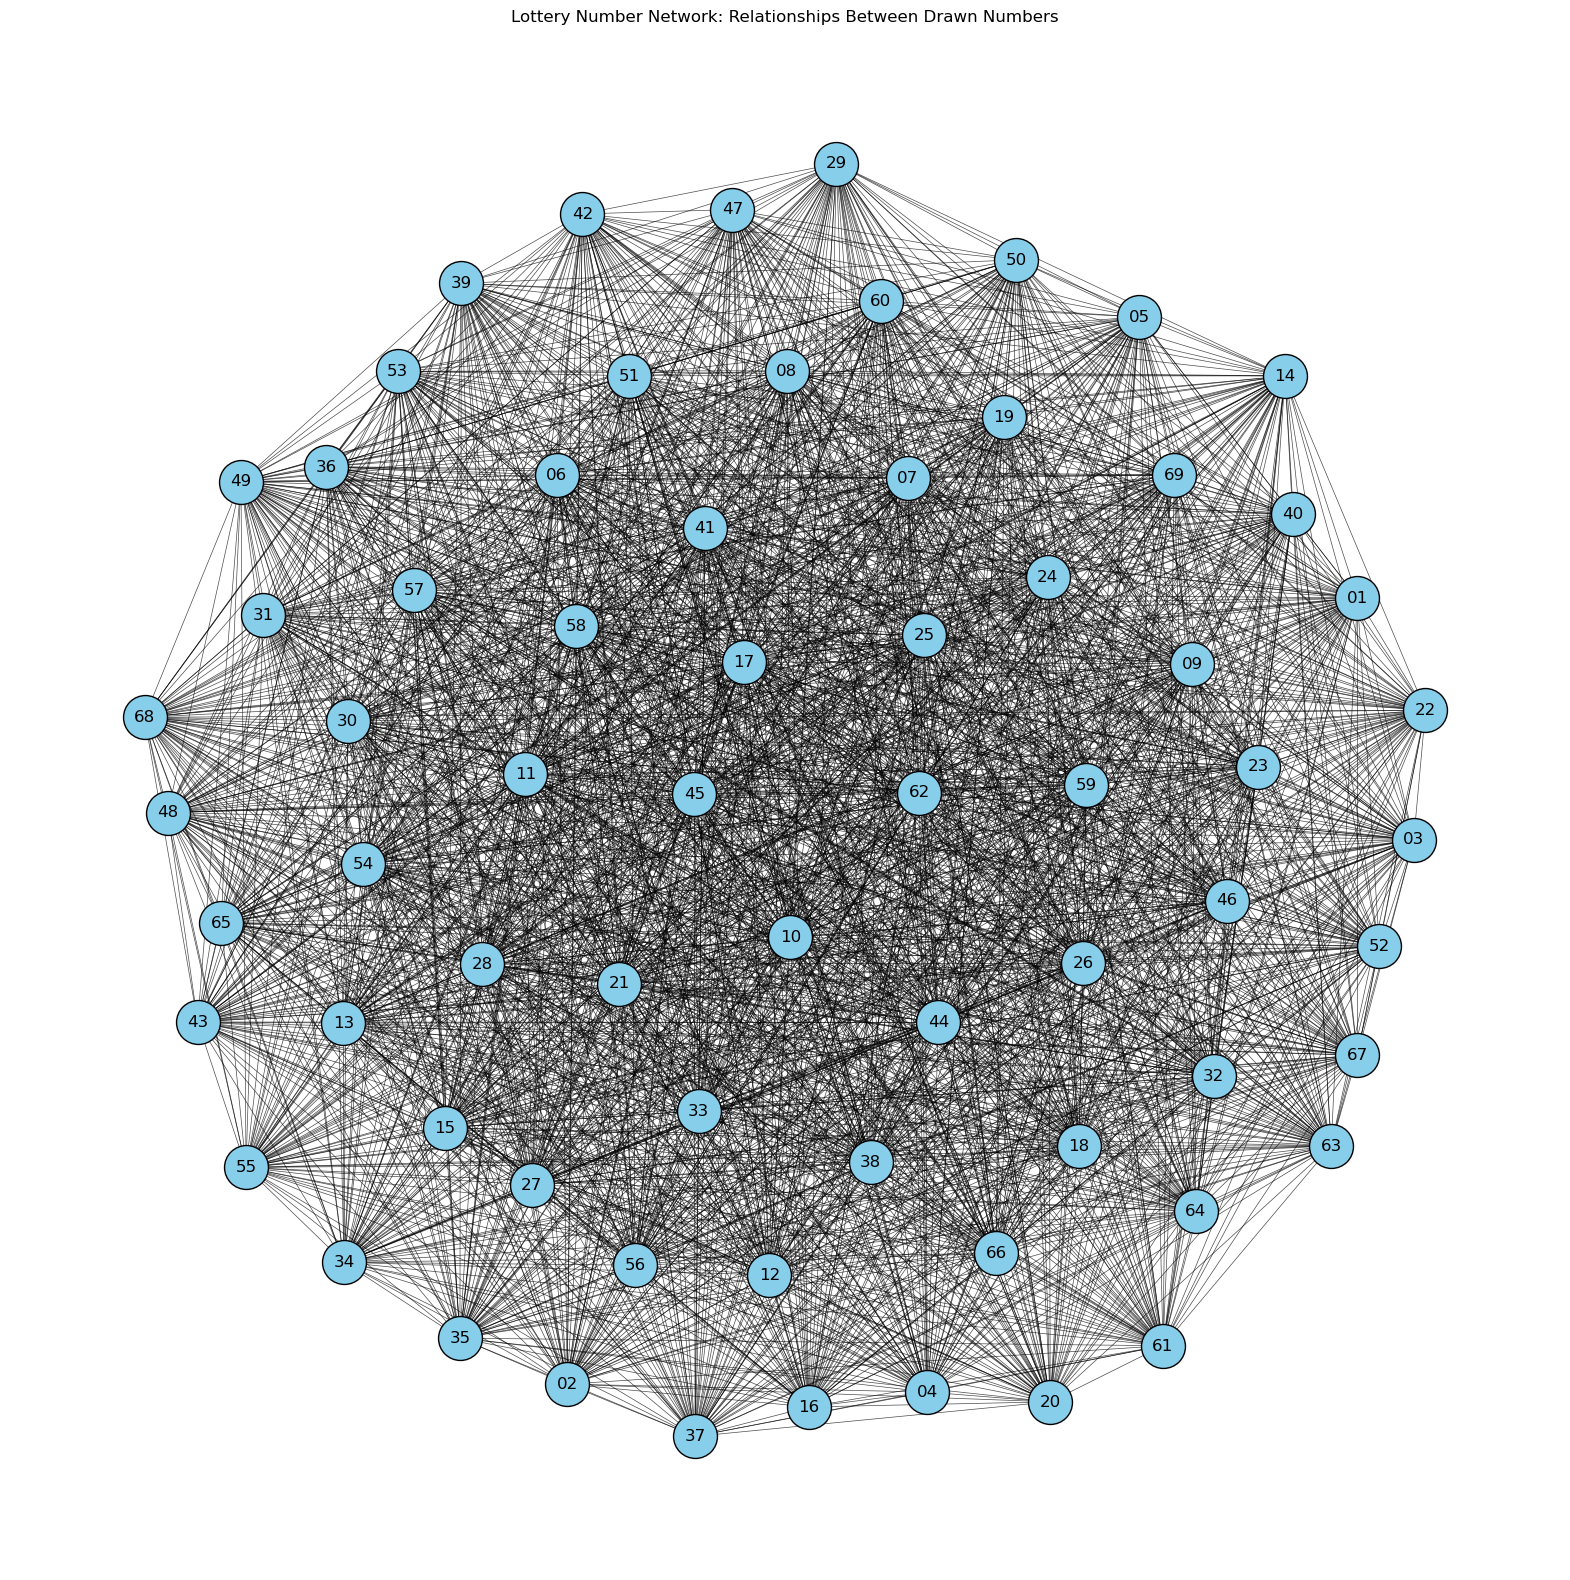

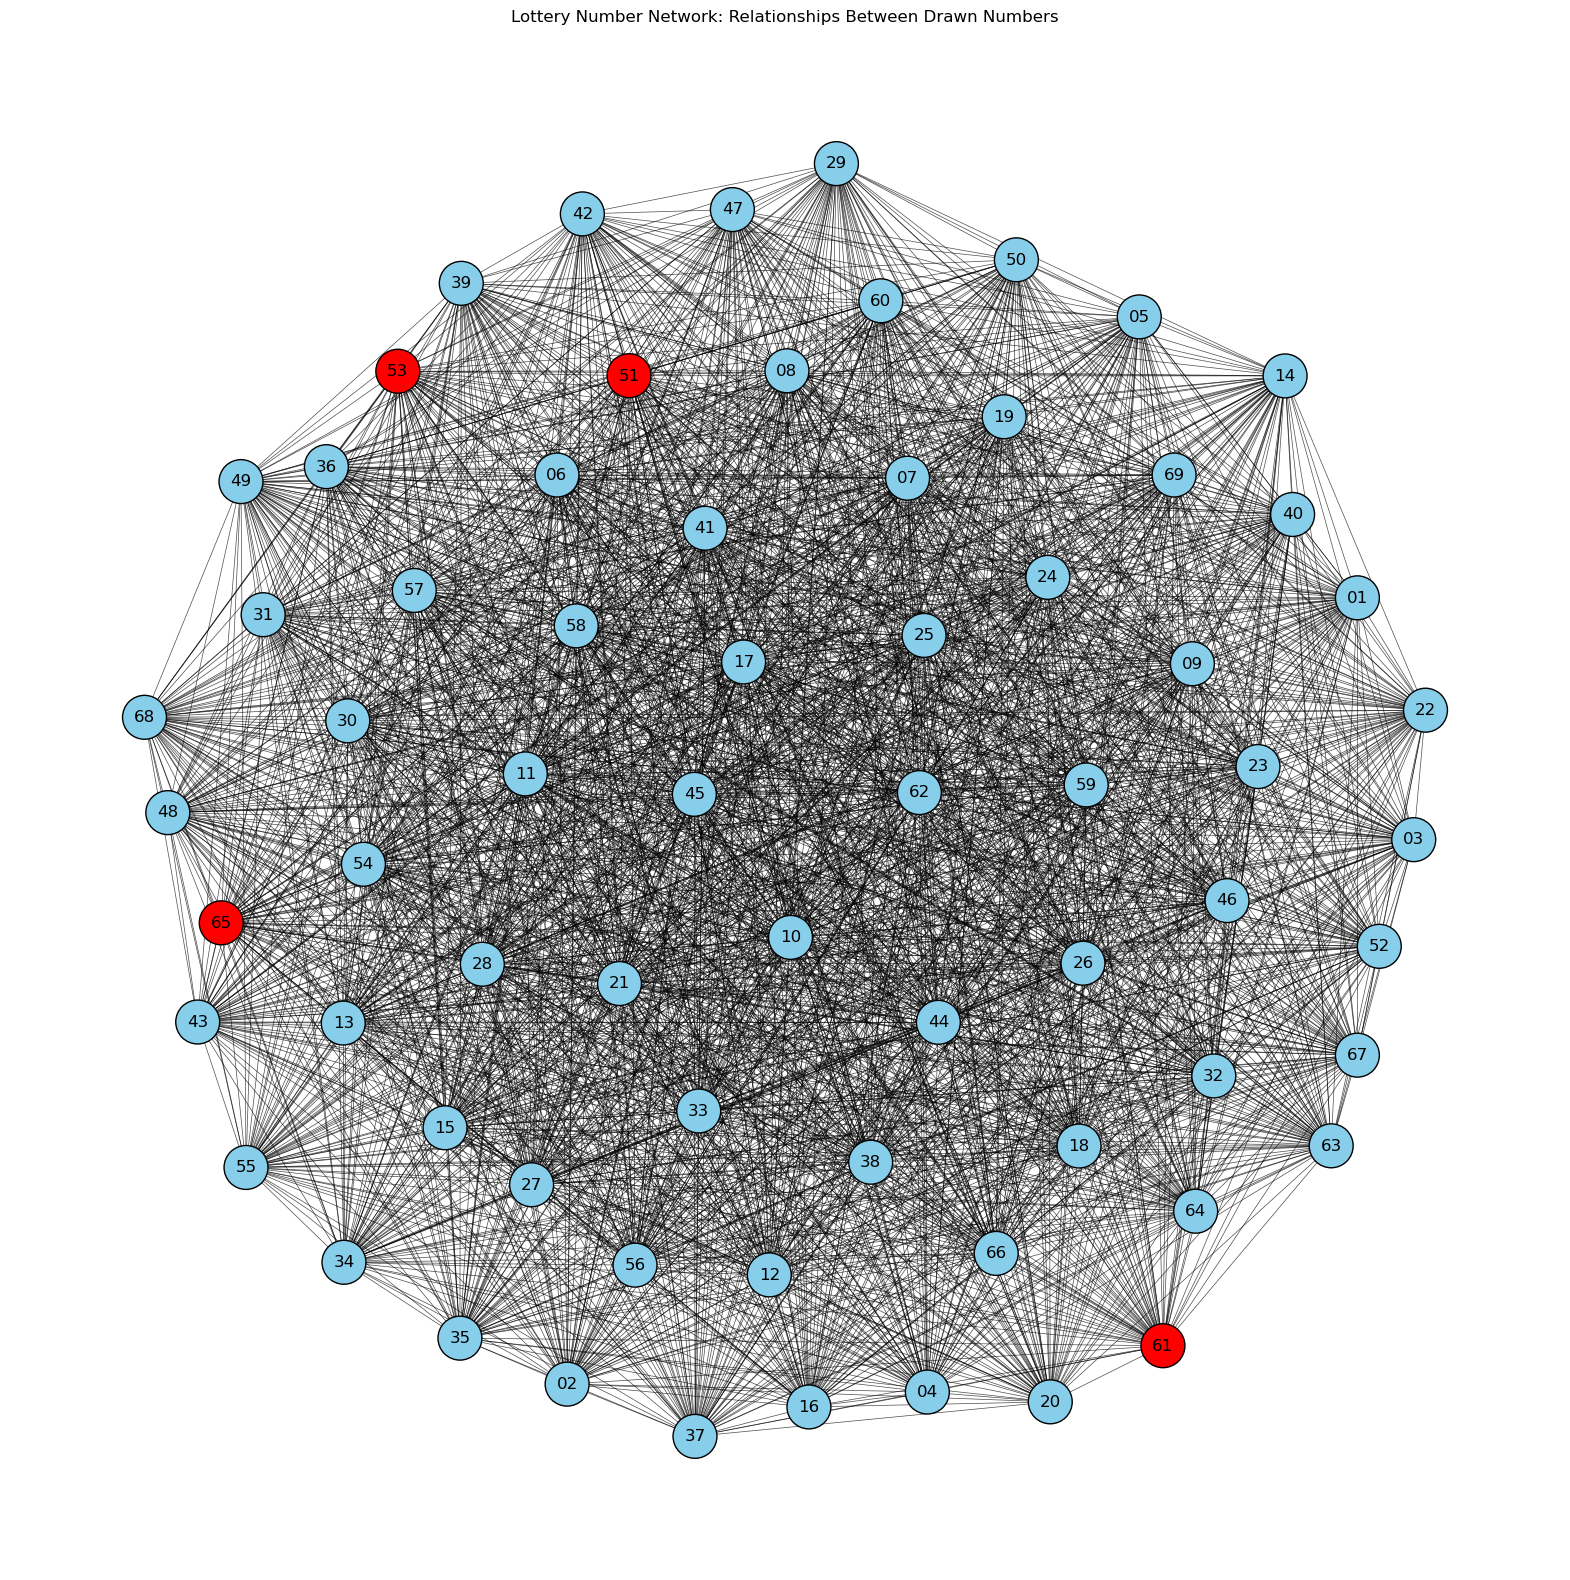

In [23]:
#creating graphs of the nodes and edges 

#the bottom 6 numbers to be highlighted 
highlight_nodes = ['53', '65', '51', '61']

pos = nx.spring_layout(G, seed=42)  # Keeps layout consistent

#first graph, no highlights
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
plt.title("Lottery Number Network: Relationships Between Drawn Numbers")
plt.axis('off')  # Turn off the axis
plt.show()

#second graph, highlights
plt.figure(figsize=(20, 20))
node_colors = ['red' if node in highlight_nodes else 'skyblue' for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
plt.title("Lottery Number Network: Relationships Between Drawn Numbers")
plt.axis('off')  # Turn off the axis
plt.show()
